# Logistic Regression (Gradient Descent)

2440050874 - Michael Julian

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train = np.array([[0.08, 0.72], [0.26, 0.58], [0.45, 0.15], [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], [0.70, 0.65], [0.92, 0.45]])
y_train = np.array([1, 1, 1, 1, 0, 0, 0, 0])
X_test = np.array([[0.10, 0.9], [0.4, 0.2], [0.8, 0.5], [0.2, 0.6]])

In [ ]:
print(f'Train data shape: {X_train.shape}')
print(f'Train data shape: {y_train.shape}')

Train data shape: (8, 2)
Train data shape: (8,)


# Dataset Visualization

In [ ]:
df = pd.concat([pd.DataFrame(X_train,columns=['x1','x2']),pd.DataFrame(y_train,columns=['y'])], axis=1, join='inner')
df.head()

,x1,x2,y
0,0.08,0.72,1
1,0.26,0.58,1
2,0.45,0.15,1
3,0.60,0.30,1
4,0.10,1.00,0


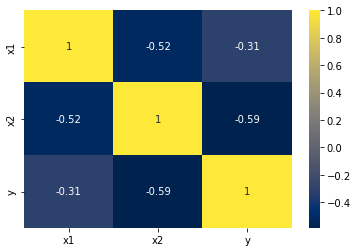

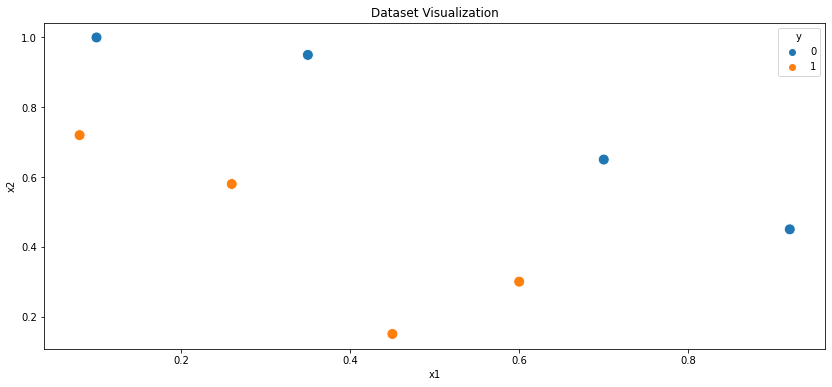

In [ ]:
#Dataset Visualization
sns.heatmap(data=df.corr(), cmap='cividis',annot=True)

plt.figure(figsize=(14, 6))
sns.scatterplot(x='x1', y='x2', data=df, hue="y", s=120)
plt.title("Dataset Visualization")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Gradient Descent

In [ ]:
#Gradient Descent
class gradientDescent:
  def __init__(self, nvar):
    self.intercept = 0
    self.weight = np.random.randn(nvar)

  def update_weight(self, X, y, y_pred, learning_rate):
    d_weight = np.dot((y_pred - y), X)
    return self.weight - (learning_rate * d_weight)

  def update_intercept(self, y, y_pred, learning_rate):
    d_intercept = np.sum(y_pred - y)
    return self.intercept - (learning_rate * d_intercept)

  def cross_entropy(self, y, y_pred):
    return np.dot((-1 * y), np.log(y_pred)) - np.dot((1 - y), np.log(1 - y_pred))

  def fit(self, X, y, epochs, learning_rate):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.weight, self.intercept)
      self.weight = self.update_weight(X, y, y_pred, learning_rate)
      self.intercept = self.update_intercept(y, y_pred, learning_rate)
      loss.append(self.cross_entropy(y, y_pred))
   
    return loss
  
  def sigmoid(self, y):
    return 1/(1 + np.exp((-1)*y))

  def predict(self, X, weight, intercept):
    y_raw = np.array(intercept + (np.dot(X, weight)))
    return self.sigmoid(y_raw)

# Learning Rate

In [ ]:
#Learning Rate Test
all_loss = []

for learning_rate in [0.3, 0.5, 0.7, 0.9]:
  model = gradientDescent(X_train.shape[1])
  epochs = 50000
  loss = model.fit(X_train, y_train, epochs, learning_rate)
  print(f'Learning Rate: {learning_rate}')
  print(f'Intercept/Bias: {model.intercept}')
  print(f'Weight/Theta: {model.weight}')
  print(f'')

  all_loss.append([learning_rate, loss])

Learning Rate: 0.3
Intercept/Bias: 38.76623762532305
Weight/Theta: [-29.63264701 -41.90764415]

Learning Rate: 0.5
Intercept/Bias: 41.754702661547746
Weight/Theta: [-31.86481196 -45.1568485 ]

Learning Rate: 0.7
Intercept/Bias: 43.734036433730054
Weight/Theta: [-33.34178749 -47.30905542]

Learning Rate: 0.9
Intercept/Bias: 45.21803426848765
Weight/Theta: [-34.44839846 -48.92273645]



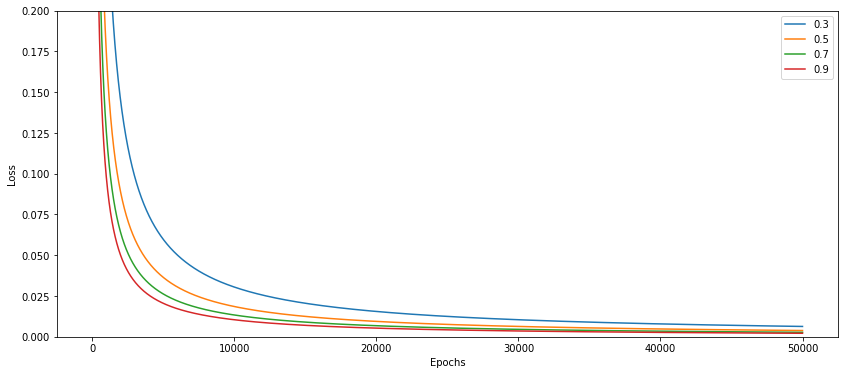

In [ ]:
#Optimal Learning Rate
plt.figure(figsize=(14,6))
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label=all_loss[i][0])

plt.ylim([0, 0.2])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Learning Rate 0.9 menghasilkan cross entropy (loss) yang paling mendekati 0

# Final Model

In [ ]:
#Building Final Model
model = gradientDescent(X_train.shape[1])
epochs = 50000
loss = model.fit(X_train, y_train, epochs, 0.9)

In [ ]:
bias = model.intercept
print('Bias (Intercept) = ', bias)

Bias (Intercept) =  45.21800583055322


In [ ]:
weight = model.weight
weights = {'Weights':weight}
weight_list = pd.DataFrame(weights)
weight_list

,Weights
0,-34.448377
1,-48.922706


In [ ]:
def threshold(y):
  return [1 if i >= 0.5 else 0 for i in y]

Hasil Predict Sigmoid Function kita konversikan menggunakan **threshold 0.5** menjadi **0** (y < 0.5) dan **1** (y >= 0.5)

# Train Data

In [ ]:
#Predict Y Train
y_pred_raw = model.predict(X_train, weight, bias)
y_pred = threshold(y_pred_raw)

In [ ]:
#Threshold Conversion
pd.DataFrame({'y_pred_raw': y_pred_raw, 'y_pred Class': y_pred})

,y_pred_raw,y_pred Class
0,0.999282,1
1,0.999624,1
2,1.000000,1
3,0.999948,1
4,0.000785,0
5,0.000002,0
6,0.000023,0
7,0.000206,0


In [ ]:
#Compare Prediction
pd.DataFrame({'y_pred Class': y_pred, 'y_dataset Class': y_train})

,y_pred Class,y_dataset Class
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0


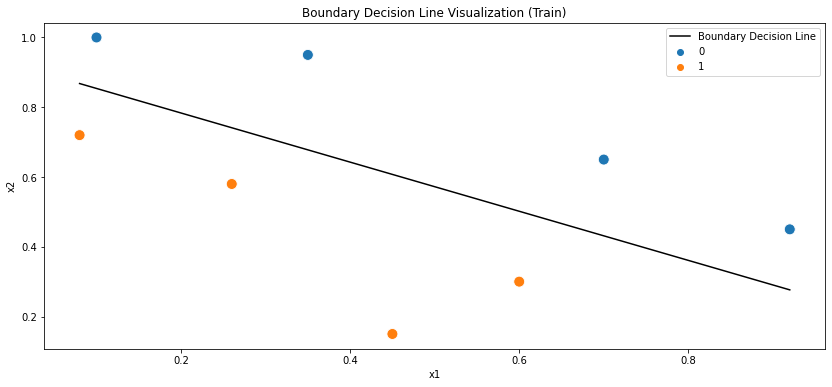

In [ ]:
#Visualize Boundary Decision Line (Train Data)
plt.figure(figsize=(14, 6))

line = (-1 * bias / weight[1]) + ((-1 * weight[0]/weight[1]) * X_train[:, 0])

sns.lineplot(x=X_train[:, 0], y=line, label='Boundary Decision Line', color='black')
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, s=120)

plt.title("Boundary Decision Line Visualization (Train)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
#Train Data Cost
cost = model.cross_entropy(y_train, y_pred_raw)
print(f'Cost: {cost*100} %')

Cost: 0.2160795931416989 %


# Test Data

In [ ]:
#Predict Y Test
y_test_raw = model.predict(X_test, weight, bias)
y_test_pred = threshold(y_test_raw)
pd.DataFrame({'y_pred_raw': y_test_raw, 'y_pred Class': y_test_pred})

,y_pred_raw,y_pred Class
0,0.094724,0
1,1.000000,1
2,0.001110,0
3,0.999873,1


Boudary Decision Line dengan Test Data

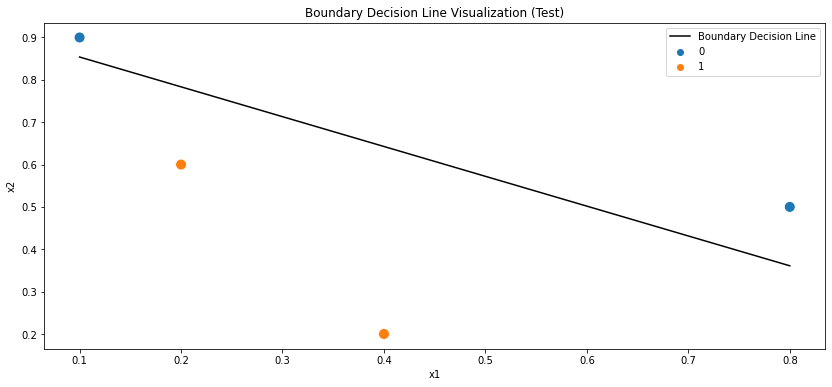

In [ ]:
#Visualize Boundary Decision Line (Test Data)
plt.figure(figsize=(14, 6))

line = (-1 * bias / weight[1]) + ((-1 * weight[0]/weight[1]) * X_test[:, 0])

sns.lineplot(x=X_test[:, 0], y=line, label='Boundary Decision Line', color='black')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test_pred, s=120)

plt.title("Boundary Decision Line Visualization (Test)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()